# Parametric analysis with EnergyPlus and Python

## Setup

In [1]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

In [2]:
energyplus_install_dir=r'C:\Users\cvskf\EnergyPlusV9-6-0'  # change this to the local EnergyPlus install directory location

In [3]:
idf_relative_filepath=r'original_input_file\1ZoneUncontrolled.idf'
epw_relative_filepath=r'weather_file\USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw'#
output_relative_directory='sim'

## Step 1: Convert .idf file to .epJSON

In [4]:
cl_st=(f'"{energyplus_install_dir}\\EnergyPlus" '
       + '--convert '  # included to create a .csv file of the results
       + f'--output-directory "{output_relative_directory}" '
       + f'--weather "{epw_relative_filepath}" '
       + f'"{idf_relative_filepath}"'
      )
print(cl_st)

"C:\Users\cvskf\EnergyPlusV9-6-0\EnergyPlus" --convert --output-directory "sim" --weather "weather_file\USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw" "original_input_file\1ZoneUncontrolled.idf"


In [5]:
result=subprocess.run(cl_st,
                      capture_output=True
                     )
print('---ARGS---\n',result.args)
print('---RETURNCODE---\n',result.returncode, '(SUCCESS)' if result.returncode==0 else '(FAIL)')
print('---STDOUT---\n',result.stdout.decode())
print('---STDERR---\n',result.stderr.decode())

---ARGS---
 "C:\Users\cvskf\EnergyPlusV9-6-0\EnergyPlus" --convert --output-directory "sim" --weather "weather_file\USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw" "original_input_file\1ZoneUncontrolled.idf"
---RETURNCODE---
 0 (SUCCESS)
---STDOUT---
 EnergyPlus Starting
EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.05.12 06:24
Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initializing Simulation
Reporting Surfaces
Beginning Primary Simulation
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Warming up {4}
Warming up {5}
Warming up {6}
Warming up {7}
Warming up {8}
Warming up {9}
Warming up {10}
Warming up {11}
Warming up {12}
Warming up {13}
Warming up {14}
Warming up {15}
Warming up {16}
Warming up {17}
Warming up {18}
Warming up {19}
Warming up {20}
Warming up {21}
Warming up {22}
Starting Simulation at 12/21 for DENVER CENTENNIAL  GOLDEN   N ANN HTG 99% CONDNS DB
Initializing New Environment Parameters
Warming up {1}
Warmi

## Step 2: Read in .epJSON file

In [6]:
with open(r'sim/1ZoneUncontrolled.epJSON') as f:
    epjson=json.load(f)
epjson

{'Building': {'Simple One Zone (Wireframe DXF)': {'loads_convergence_tolerance_value': 0.04,
   'maximum_number_of_warmup_days': 30,
   'minimum_number_of_warmup_days': 6,
   'north_axis': 0,
   'solar_distribution': 'MinimalShadowing',
   'temperature_convergence_tolerance_value': 0.004,
   'terrain': 'Suburbs'}},
 'BuildingSurface:Detailed': {'Zn001:Flr001': {'construction_name': 'FLOOR',
   'number_of_vertices': 4,
   'outside_boundary_condition': 'Adiabatic',
   'sun_exposure': 'NoSun',
   'surface_type': 'Floor',
   'vertices': [{'vertex_x_coordinate': 15.24,
     'vertex_y_coordinate': 0.0,
     'vertex_z_coordinate': 0.0},
    {'vertex_x_coordinate': 0.0,
     'vertex_y_coordinate': 0.0,
     'vertex_z_coordinate': 0.0},
    {'vertex_x_coordinate': 0.0,
     'vertex_y_coordinate': 15.24,
     'vertex_z_coordinate': 0.0},
    {'vertex_x_coordinate': 15.24,
     'vertex_y_coordinate': 15.24,
     'vertex_z_coordinate': 0.0}],
   'view_factor_to_ground': 1.0,
   'wind_exposure': 'N

## Step 3: Make changes to .epJSON file and save

Here, changes are made to the thermal resistance of the 'R13LAYER' material (which is the wall material of the building).

The values used are 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0.


In [7]:
new_values=[x*0.5 for x in range(1,11)]
new_values

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [8]:
for i in new_values:
    print(i, end=' ')
    epjson_new=epjson
    epjson_new['Material:NoMass']['R13LAYER']['thermal_resistance']=i
    with open(f'generated_input_files//1ZoneUncontrolled_thermal_resistance_{i}.epJSON', 'w') as f:
        json.dump(epjson_new,f,indent=4)
    

0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 

## Step 4: Run EnergyPlus simulation on all generated input files

In [9]:
for i in new_values:
    print(i, end=' ')
    input_file=r'generated_input_files/1ZoneUncontrolled_thermal_resistance_%s.epJSON' % i
    cl_st=(f'"{energyplus_install_dir}\\EnergyPlus" '
       + f'--output-prefix thermal_resistance_{i}_ '
       + '--readvars '  # included to create a .csv file of the results
       + f'--output-directory output_files '
       + f'--weather "{epw_relative_filepath}" '
       + f'"{input_file}"'
      )
    print(cl_st)
    result=subprocess.run(cl_st,capture_output=True)
    print('RETURNCODE: ',result.returncode, '(SUCCESS)' if result.returncode==0 else '(FAIL)')
    print('---')

0.5 "C:\Users\cvskf\EnergyPlusV9-6-0\EnergyPlus" --output-prefix thermal_resistance_0.5_ --readvars --output-directory output_files --weather "weather_file\USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw" "generated_input_files/1ZoneUncontrolled_thermal_resistance_0.5.epJSON"
RETURNCODE:  0 (SUCCESS)
---
1.0 "C:\Users\cvskf\EnergyPlusV9-6-0\EnergyPlus" --output-prefix thermal_resistance_1.0_ --readvars --output-directory output_files --weather "weather_file\USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw" "generated_input_files/1ZoneUncontrolled_thermal_resistance_1.0.epJSON"
RETURNCODE:  0 (SUCCESS)
---
1.5 "C:\Users\cvskf\EnergyPlusV9-6-0\EnergyPlus" --output-prefix thermal_resistance_1.5_ --readvars --output-directory output_files --weather "weather_file\USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw" "generated_input_files/1ZoneUncontrolled_thermal_resistance_1.5.epJSON"
RETURNCODE:  0 (SUCCESS)
---
2.0 "C:\Users\cvskf\EnergyPlusV9-6-0\EnergyPlus" --output-prefix thermal_resistance_2.0_ --

## Step 5: Create a parser for the EnergyPlus datetime strings in the results file

In [10]:
def parse_energyplus_datetime_string(st, year=2021):
    st=st.strip()
    month=int(st[0:2])
    day=int(st[3:5])
    hour=int(st[7:9])
    minute=int(st[10:12])
    second=(st[13:15])
    if not hour==24:
        dt=pd.Timestamp(year,month,day,hour,minute)
    else:
        hour=0
        dt=pd.Timestamp(year,month,day,hour,minute)
        dt+=pd.Timedelta('1 day')
    return dt

# test of function - should output `Timestamp('2021-12-21 01:00:00')`
parse_energyplus_datetime_string(' 12/21  01:00:00')

Timestamp('2021-12-21 01:00:00')

## Step 6: Read in all EnergyPlus results file

In [11]:
x=[]
for i in new_values:
    print(i, end=' ')
    fp=r'output_files/thermal_resistance_%s_out.csv' % i
    df_temp=pd.read_csv(fp, 
                        parse_dates=[0],
                        skiprows=(lambda x: x>0 and x<49), 
                            # skips rows 1 to 49, the design summer day and the design winter day in the results csv file.
                        date_parser=parse_energyplus_datetime_string  
                            # parses the date strings using the function defined above
                       )
    df_temp['simulation_run']='thermal_resistance_%s' % i
    df_temp=df_temp[list(df_temp.columns[-1:])+list(df_temp.columns[:-1])]  
        # moves the 'simulation_run' column to the first column position
    x.append(df_temp)
df=pd.concat(x)
df

0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 

,simulation_run,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),Environment:Site Total Sky Cover [](Hourly),Environment:Site Opaque Sky Cover [](Hourly),Environment:Site Daylight Saving Time Status [](Daily),Environment:Site Day Type Index [](Daily),ZONE ONE:Zone Total Internal Latent Gain Energy [J](Hourly),TEST 352 MINUS:Other Equipment Total Heating Energy [J](Monthly),TEST 352A:Other Equipment Total Heating Energy [J](Monthly),...,ZN001:FLR001:Surface Inside Face Temperature [C](Daily),ZN001:FLR001:Surface Outside Face Temperature [C](Daily),ZN001:FLR001:Surface Inside Face Convection Heat Transfer Coefficient [W/m2-K](Daily),ZN001:ROOF001:Surface Inside Face Temperature [C](Daily),ZN001:ROOF001:Surface Outside Face Temperature [C](Daily),ZN001:ROOF001:Surface Inside Face Convection Heat Transfer Coefficient [W/m2-K](Daily),ZN001:ROOF001:Surface Outside Face Convection Heat Transfer Coefficient [W/m2-K](Daily),ZONE ONE:Zone Mean Air Temperature [C](Hourly),ZONE ONE:Zone Air Heat Balance Surface Convection Rate [W](Hourly),ZONE ONE:Zone Air Heat Balance Air Energy Storage Rate [W](Hourly)
0,thermal_resistance_0.5,2021-01-01 01:00:00,7.0125,1.250,1.250,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.891973,-148.103142,-151.574001
1,thermal_resistance_0.5,2021-01-01 02:00:00,7.2000,3.250,3.250,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.593229,-64.774820,-77.480556
2,thermal_resistance_0.5,2021-01-01 03:00:00,6.8875,3.375,3.375,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.367034,-123.298048,-110.576001
3,thermal_resistance_0.5,2021-01-01 04:00:00,6.3250,1.125,1.125,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.951547,-184.064433,-176.943179
4,thermal_resistance_0.5,2021-01-01 05:00:00,5.0375,1.875,1.875,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.453749,-178.926482,-181.608218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,thermal_resistance_5.0,2021-12-31 20:00:00,13.1125,7.750,7.750,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.093863,-0.747516,-0.610569
8756,thermal_resistance_5.0,2021-12-31 21:00:00,12.6125,5.750,5.750,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.068599,-25.067334,-19.758388
8757,thermal_resistance_5.0,2021-12-31 22:00:00,11.2000,5.000,5.000,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.969965,-40.241033,-40.768846
8758,thermal_resistance_5.0,2021-12-31 23:00:00,10.6000,7.500,7.500,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.889272,-14.400874,-19.052202


## Step 7: Analyse the EnergyPlus results

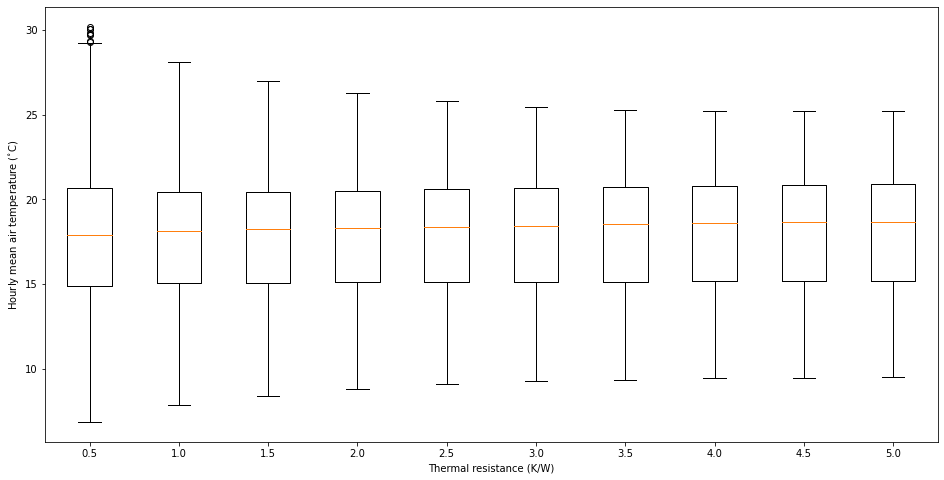

Figure 1: Box plot of hourly Zone One mean air temperatures for different thermal resistances of the R13LAYER wall material.


In [12]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(16,8))
df_plot=df.pivot(index='Date/Time',
                 columns='simulation_run',
                 values='ZONE ONE:Zone Mean Air Temperature [C](Hourly)')
ax.boxplot(df_plot)
ax.set_xticklabels([x[-3:] for x in df_plot.columns])
ax.set_xlabel('Thermal resistance (K/W)')
ax.set_ylabel('Hourly mean air temperature ($^{\circ}$C)')
fig.savefig('Boxplot.png')
plt.show()
print('Figure 1: Box plot of hourly Zone One mean air temperatures for different thermal resistances of the R13LAYER wall material.')